In [8]:
import pickle
import matplotlib.pyplot as plt
import copy
import numpy as np
import os
%matplotlib inline

In [2]:
class Individual():
    '''
    用于产生CGP中的个体
    '''
    def __init__(self):
        self.fitness = 0
        self.generation = 0
        self.function_matrix = init_function_matrix(n_row, n_col, function_set)
        self.connect_matrix = init_connect_matrix(n_input, n_output, level_back, self.function_matrix)
        self.active_matrix = init_active_matrix(n_input, self.connect_matrix)
        #self.value_matrix = init_value_matrix(x, self.active_matrix, self.connect_matrix, self.function_matrix)

In [3]:
class Function:
    def __init__(self, f, arity, name):
        self.f = f
        self.arity = arity
        self.name = name
    def __call__(self, *args, **kwargs):
        return self.f(*args, **kwargs)

def protected_div(a, b):
    if abs(b) < 1e-6:
        return a
    return a / b

def avg(a, b):
    return (a + b)/2

def protected_sqrt(a):
    return math.sqrt(abs(a))

def square(a):
    return a*a

In [4]:
def active_percent(active_matrix):
    b = active_matrix
    b1 = b[0]
    b2 = b[1:]
    b1 = np.array(b1)
    b2 = np.array(b2)
    b1[b1>0]=1
    b2[b2>0]=1
    pixel_active_percent = np.sum(b1)/b1.size
    node_active_percent = np.sum(b2)/b2.size
    return pixel_active_percent, node_active_percent

In [46]:
pop_history_file = './pop_history/2021_02_20-2/'

In [57]:
pop_num = len(os.listdir(pop_history_file))
best_fitness = []
avg_fitness = []
best_pixel_active = []
best_node_active = []
xValue = []

for i in range(pop_num):
    xValue.append(i)
    with open(pop_history_file + str(i), 'rb') as f:
        pop = pickle.load(f)
        best_fitness.append(pop[-1].fitness)
        '''pixel_active_percent, node_active_percent = active_percent(pop[-1].active_matrix)
        best_pixel_active.append(pixel_active_percent)
        best_node_active.append(node_active_percent)
        temp1 = 0
        for indiv in pop:
            temp1 = temp1 + indiv.fitness
        avg_fitness.append(temp1/len(pop))'''

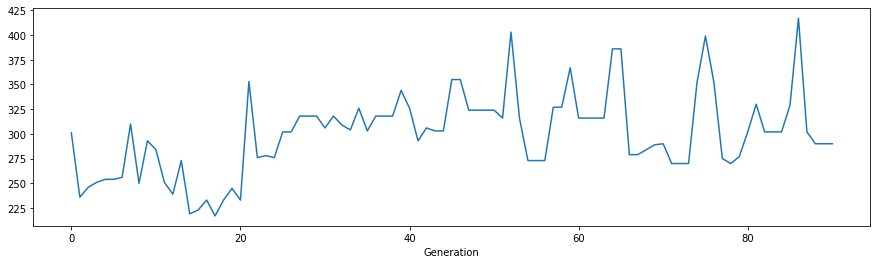

In [58]:
yValue = best_fitness

plt.figure(figsize = (15,4))
#plt.title('line chart')
plt.xlabel('Generation')
#plt.ylabel('Population Average Fitness')
plt.plot(xValue, yValue)
#g = g + gen_num
#pic_name = 'D:\\AAACLASS\\IPP\\CGP\\images\\softmax5-64-100-50-50\\' + str(g) + '.png'
#plt.savefig(pic_name)
plt.show()

In [49]:
with open(pop_history_file + '5', 'rb') as f:
    pop = pickle.load(f)

In [29]:
a = []